# Random graph models: simulations using GraSPy

In [1]:
import graspy
import numpy as np 
import seaborn as sns
from graspy.simulations import er_np, sbm, rdpg
from graspy.plot import heatmap
np.random.seed(8888)
%matplotlib inline
sns.set_context('talk', font_scale=2)
heatmap_kws = dict(cbar=False, font_scale=2)
print("GraSPy version: {}".format(graspy.__version__))

GraSPy version: 0.1.1


Here we will consider undirected, unweighted graphs

## Erdos-Renyi (ER) 
Erdos-Renyi (ER) graphs are the simplest generative model we will consider. Here, the probability of a connection between any two nodes is the same, specified by the parameter $p$. We will also specify $n$, the number of nodes. 

Below we sample an ER graph with 100 nodes and an overall connection probability of 0.3. 

(100, 100)


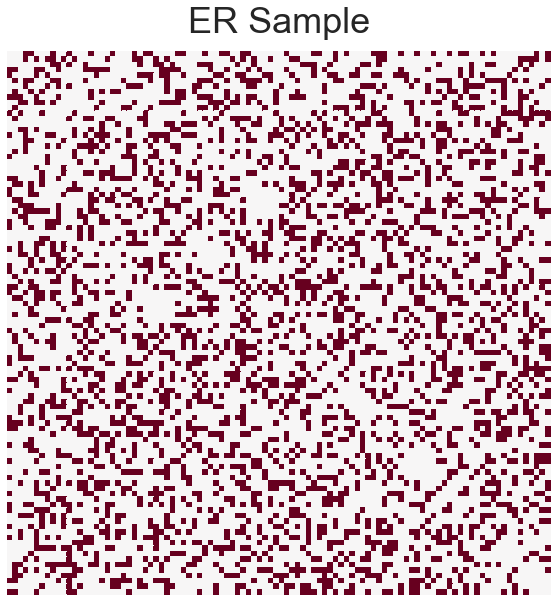

In [2]:
n = 100
p = 0.3
er_sample = er_np(n=n, p=p)
print(er_sample.shape)
heatmap(er_sample, title="ER Sample", **heatmap_kws)

We can also specify a directed graph

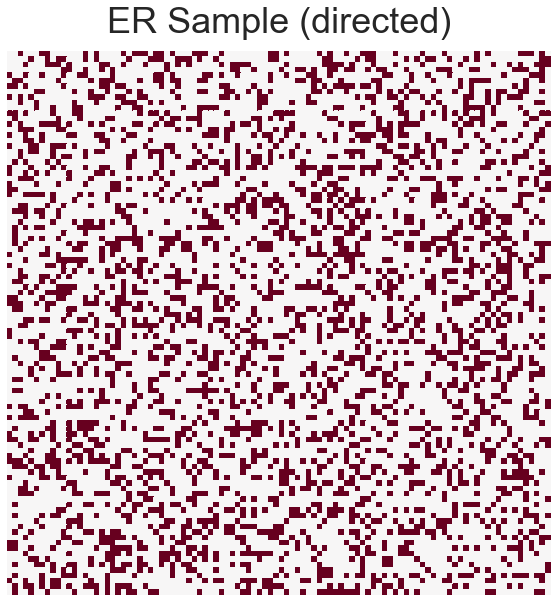

In [3]:
er_sample = er_np(n=n, p=p, directed=True)
heatmap(er_sample, title="ER Sample (directed)", **heatmap_kws)

## Stochastic Block Model (SBM) 
The stochastic block model is slightly more complicated, as each node is assigned into a community. The probability of an edge from node $i$ to node $j$ is purely a function of the blocks that node $i$ and $j$ belong to. This is specified by a $K \times K$ matrix $B$, where the element $B_{k, l}$ represents the probability of connections from block $k$ to block $l$. 

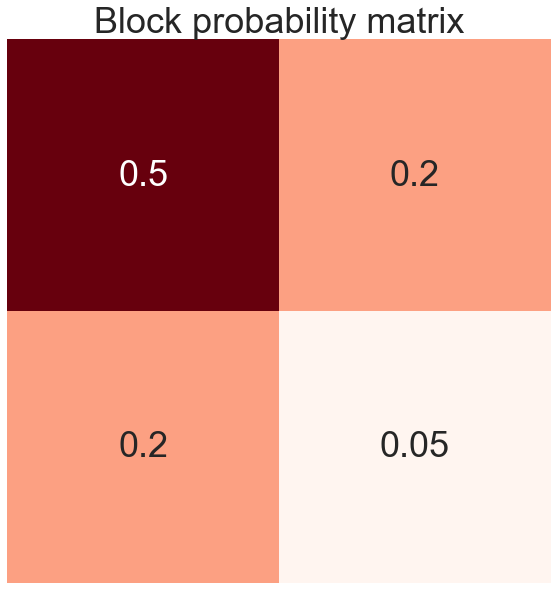

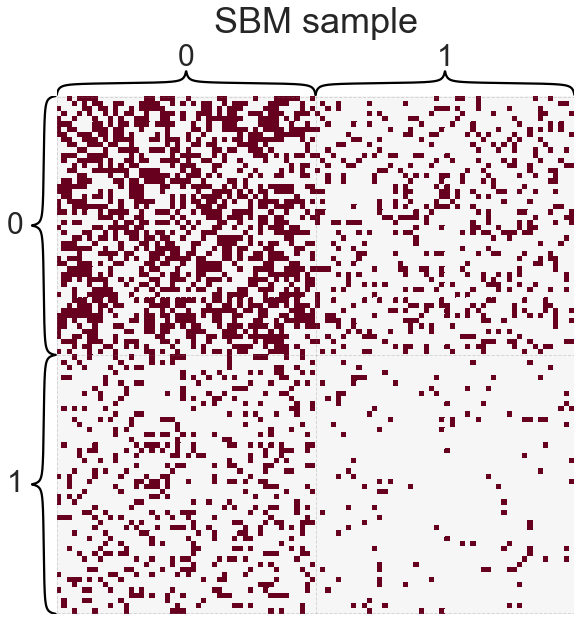

In [4]:
B = [[0.5, 0.2],
     [0.2, 0.05]]

n = [50, 50] # this is the number of verts in each block

labels = n[0]*[0] + n[1] * [1] # just for plotting

sbm_sample = sbm(n, B)


plt.figure(figsize=(10,10))
ax = sns.heatmap(B,
                 cbar=False,
                 square=True,
                 annot=True,
                 cmap="Reds",
                 xticklabels=False,
                 yticklabels=False)
plt.title('Block probability matrix')


heatmap(sbm_sample, title='SBM sample', inner_hier_labels=labels, **heatmap_kws)

## Random Dot Product Graph (RDPG)

The RDPG model assumes that each vertex in the graph has a hidden, $d$-dimensional latent position which governs its probability of connection with other nodes. The probability of a connection between node $i$ and node $j$ is just equal to the dot product of their latent positions. These latent positions are typically unobserved, but we can estimate them from an observed graph (more on that in a later tutorial). 

In this case, we will sample latent positions from a uniform distribution on part of the Hardy-Weinberg curve (this is simply some quadradic function in 2 dimensions, in this case). From these latent positions, we can sample a random graph. 

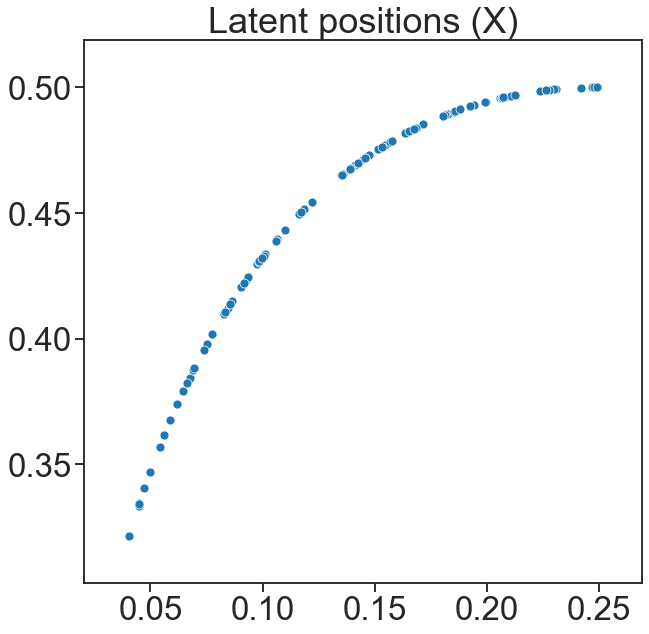

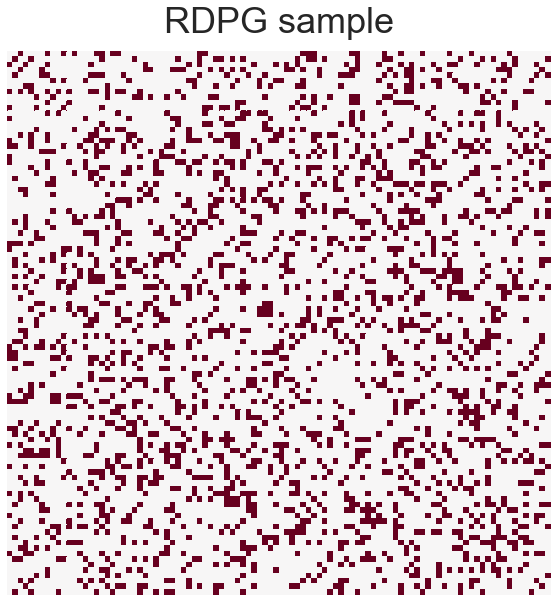

In [7]:
def hardy_weinberg(theta):
    """
    Quadratic function of some distance theta
    
    """
    hw = [theta ** 2, 2 * theta * (1 - theta), ]
    return np.array(hw).T

n = 100

dists = np.random.uniform(0.2, 0.5, size=(n))

X = hardy_weinberg(dists)
rdpg_sample = rdpg(X)

plt.figure(figsize=(10,10))
sns.scatterplot(X[:, 0], X[:, 1])
plt.title('Latent positions (X)')

heatmap(rdpg_sample, title='RDPG sample', **heatmap_kws)